In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")
%matplotlib inline

In [3]:
df = pd.read_csv("cleaned_dataset.csv", parse_dates=['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,CompetitionOpenDate,DaysSinceCompetitionOpen,IsPromoMonth,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,31,212,2008-09-01,2524,0,False,True,False,False,False
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,...,31,212,2007-11-01,2829,1,False,False,False,False,False
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,...,31,212,2006-12-01,3164,1,False,False,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,...,31,212,2009-09-01,2159,0,False,True,False,False,True
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,...,31,212,2015-04-01,121,0,False,False,False,False,False


In [4]:
df = df[df['Open'] == 1].copy()

In [ ]:
print(f"Dataset shape (open stores only): {df.shape}")
df.head()

Dataset shape (open stores only): (844392, 29)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,WeekOfYear,DayOfYear,CompetitionOpenDate,DaysSinceCompetitionOpen,IsPromoMonth,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,31,212,2008-09-01,2524,0,False,True,False,False,False
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,...,31,212,2007-11-01,2829,1,False,False,False,False,False
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,...,31,212,2006-12-01,3164,1,False,False,False,False,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,...,31,212,2009-09-01,2159,0,False,True,False,False,True
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,...,31,212,2015-04-01,121,0,False,False,False,False,False


In [6]:
store_type_cols = ['StoreType_b', 'StoreType_c', 'StoreType_d']
assortment_cols = ['Assortment_b', 'Assortment_c']

df['StoreType'] = np.select(
    [df['StoreType_d']==1, df['StoreType_c']==1, df['StoreType_b']==1],
    ['d', 'c', 'b'], default='a')

df['Assortment'] = np.select(
    [df['Assortment_c']==1, df['Assortment_b']==1],
    ['c', 'b'], default='a')

1. Sales Trends (3 simple plots)

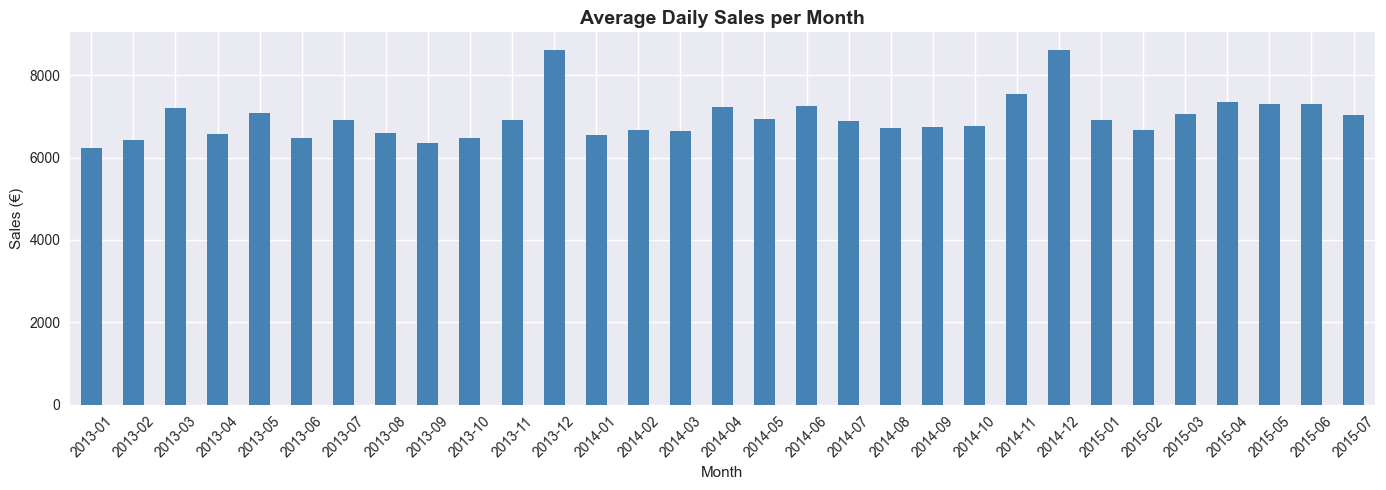

In [ ]:
# Monthly average sales
monthly = df.groupby(df['Date'].dt.to_period('M'))['Sales'].mean()

plt.figure(figsize=(14, 5))
monthly.plot(kind='bar', color='steelblue')
plt.title('Average Daily Sales per Month', fontsize=14, weight='bold')
plt.ylabel('Sales (€)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/monthly_sales.png', dpi=200)
plt.show()

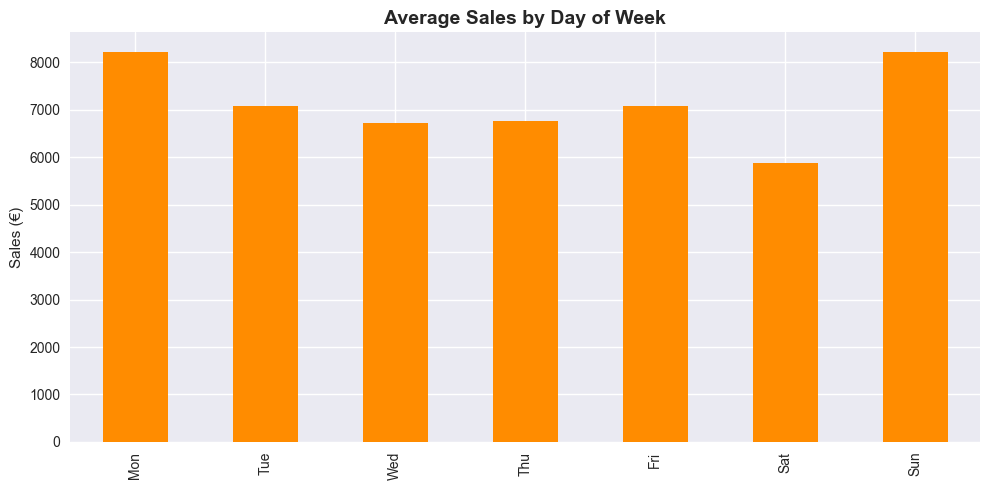

In [8]:
# Day of week pattern
dow = df.groupby('DayOfWeek')['Sales'].mean()
dow.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 5))
dow.plot(kind='bar', color='darkorange')
plt.title('Average Sales by Day of Week', fontsize=14, weight='bold')
plt.ylabel('Sales (€)')
plt.tight_layout()
plt.savefig('images/dow_sales.png', dpi=200)
plt.show()

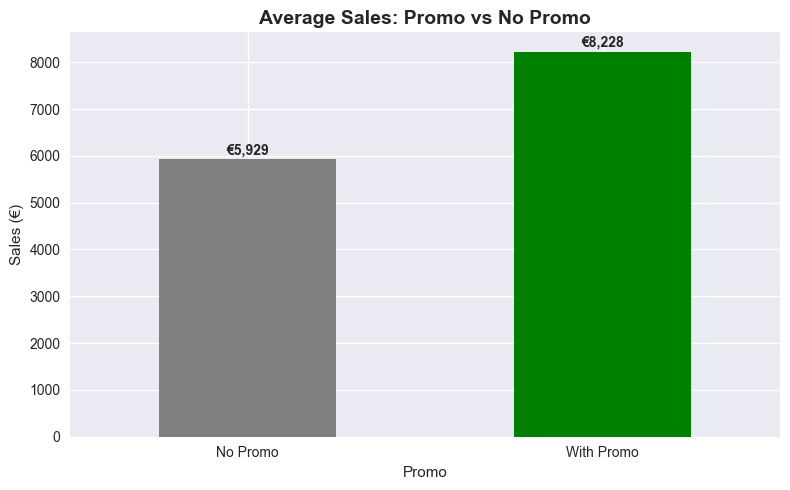

Promotion increases sales by 38.8%


In [9]:
# Promo effect – the most important chart
promo_effect = df.groupby('Promo')['Sales'].mean()

plt.figure(figsize=(8, 5))
promo_effect.plot(kind='bar', color=['gray', 'green'])
plt.title('Average Sales: Promo vs No Promo', fontsize=14, weight='bold')
plt.xticks([0, 1], ['No Promo', 'With Promo'], rotation=0)
plt.ylabel('Sales (€)')
for i, v in enumerate(promo_effect):
    plt.text(i, v + 100, f"€{v:,.0f}", ha='center', weight='bold')
plt.tight_layout()
plt.savefig('images/promo_effect.png', dpi=200)
plt.show()

lift = (promo_effect[1] / promo_effect[0] - 1) * 100
print(f"Promotion increases sales by {lift:.1f}%")

2. Store Type Performance

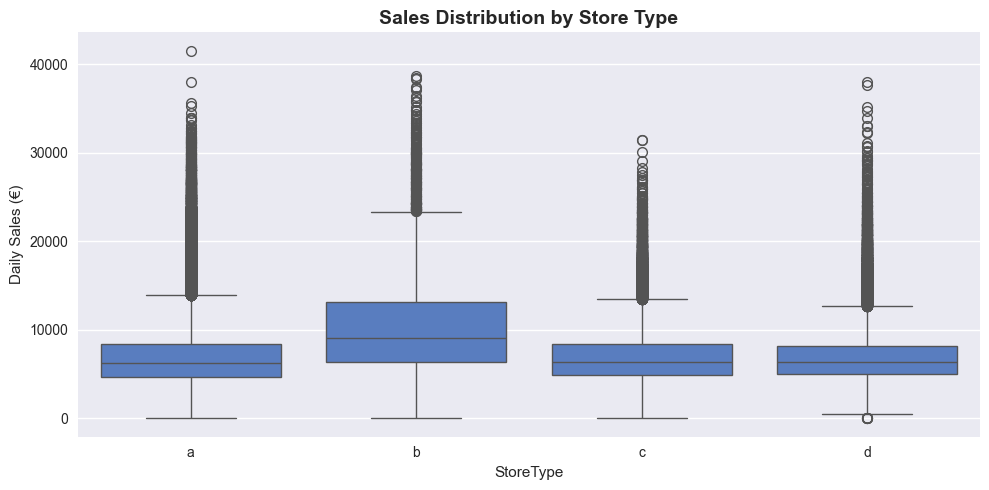

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='StoreType', y='Sales', order=['a','b','c','d'])
plt.title('Sales Distribution by Store Type', fontsize=14, weight='bold')
plt.ylabel('Daily Sales (€)')
plt.tight_layout()
plt.savefig('images/storetype_sales.png', dpi=200)
plt.show()

3. Top 10 Stores

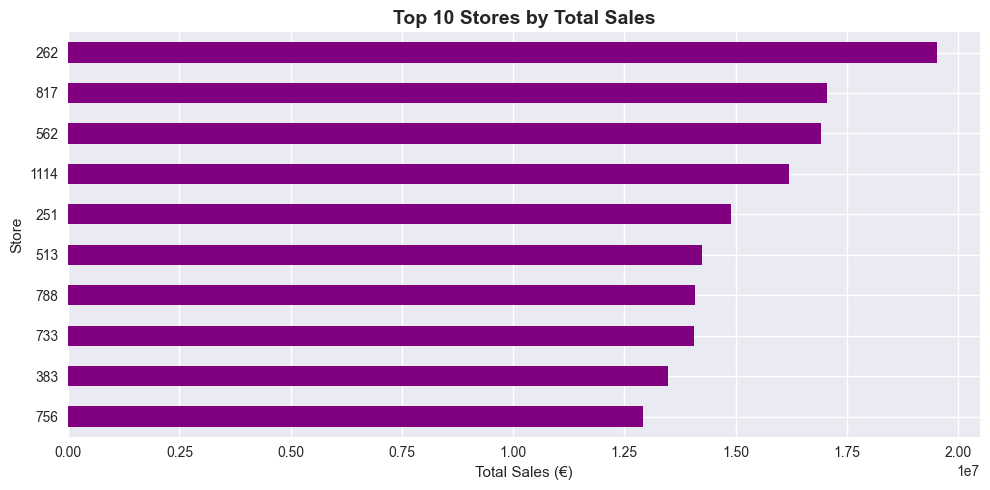

In [11]:
top10 = df.groupby('Store')['Sales'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top10.sort_values().plot(kind='barh', color='purple')
plt.title('Top 10 Stores by Total Sales', fontsize=14, weight='bold')
plt.xlabel('Total Sales (€)')
plt.tight_layout()
plt.savefig('images/top10_stores.png', dpi=200)
plt.show()

4. Correlation Heatmap (only important features)

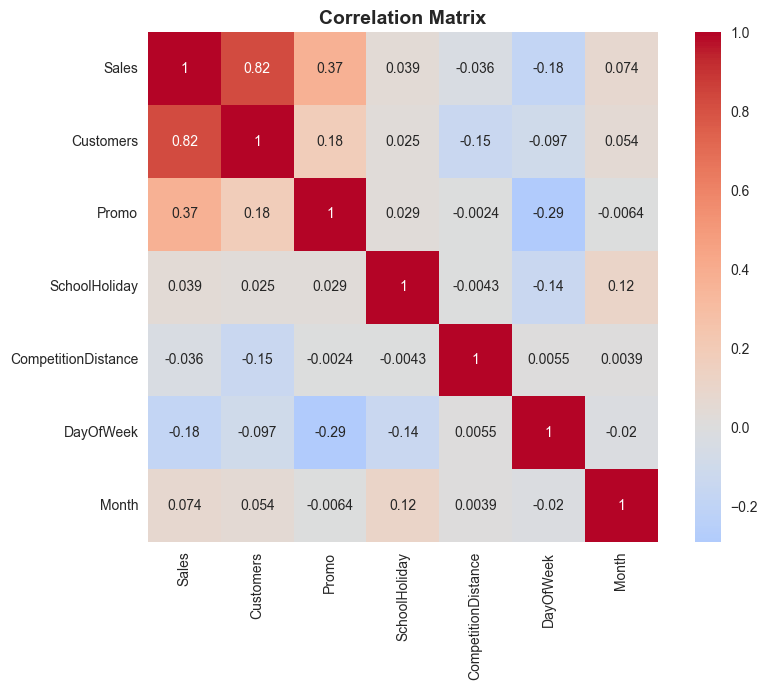

In [13]:
key_cols = ['Sales', 'Customers', 'Promo', 'SchoolHoliday', 
            'CompetitionDistance', 'DayOfWeek', 'Month']

plt.figure(figsize=(9, 7))
sns.heatmap(df[key_cols].corr(), annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('images/correlation.png', dpi=200)
plt.show()